<a href="https://colab.research.google.com/github/tekgulburak/Deep-Neural-Networks-on-a-GPU/blob/main/NikevsAdidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [72]:
!kaggle datasets download -d ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [73]:
!ls

'image resized'   test_new	 train_new
 sample_data	  test_new.zip	 train_new.zip


In [74]:
from zipfile import ZipFile
dataset="/content/train_new.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [75]:
import os
path,dirs,files=next(os.walk('/content/train_new'))
file_count=len(files)
print("number of images:",file_count)


number of images: 460


In [76]:
file_names=os.listdir("/content/train_new")
print(file_names)

['Adidas (54).JPG', 'Image_205.jpg', 'adidas_ (23).jpg', 'Adidas (84).jpg', 'Image_18.jpg', 'adidas_ (6).jpg', 'Image_25.jpg', 'adidas_ (72).jpg', 'Image_249.jpg', 'Image_156.jpg', 'Adidas (10).jpg', 'adidas_ (147).jpg', 'adidas_ (139).jpg', 'Adidas (45).jpg', 'Image_74.jpg', 'adidas_ (78).jpg', 'Image_222.jpg', 'Image_137.jpg', 'Image_165.jpg', 'adidas_ (97).jpg', 'Image_115.jpg', 'adidas_ (111).jpg', 'Image_104.JPG', 'Image_153.jpg', 'Image_116.jpg', 'Image_151.jpg', 'adidas_ (114).jpg', 'adidas_ (21).jpg', 'Image_184.jpg', 'Image_26.jpg', 'adidas_ (22).jpg', 'Adidas (7).jpg', 'Image_99.JPG', 'adidas_ (145).jpg', 'Image_204.jpg', 'Image_224.jpg', 'adidas_ (38).jpg', 'adidas_ (66).jpg', 'Image_15.jpg', 'Adidas (15).jpg', 'Image_141.jpg', 'Adidas (73).jpg', 'Image_85.jpg', 'adidas_ (104).jpg', 'adidas_ (112).jpg', 'Image_117.jpg', 'Image_214.jpg', 'Image_76.jpg', 'adidas_ (143).jpg', 'Image_253.jpg', 'adidas_ (3).jpg', 'Image_66.jpg', 'Image_157.jpg', 'adidas_ (134).jpg', 'adidas_ (42)

In [77]:
from zipfile import ZipFile
dataset="/content/test_new.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [78]:
import os
path,dirs,files=next(os.walk('/content/test_new'))
file_count=len(files)
print("number of images:",file_count)

number of images: 60


In [79]:
file_names=os.listdir("/content/test_new")
print(file_names)

['Adidas (18).jpg', 'aadidas_ (10).jpg', 'Image_259.jpg', 'Image_260.jpg', 'Image_257.jpg', 'aadidas_ (8).jpg', 'Image_130.jpg', 'aadidas_ (4).jpg', 'aadidas_ (15).jpg', 'Adidas (27).jpg', 'Adidas (26).jpg', 'aadidas_ (11).jpg', 'Image_250.jpg', 'Image_30.jpg', 'Image_100.jpg', 'aadidas_ (17).jpg', 'Image_160.jpg', 'Image_258.jpg', 'aadidas_ (13).jpg', 'Image_200.jpg', 'aadidas_ (7).jpg', 'Adidas (24).jpg', 'Image_170.jpg', 'aadidas_ (16).jpg', 'aadidas_ (3).jpg', 'Image_240.jpg', 'Image_210.jpg', 'aadidas_ (9).jpg', 'aadidas_ (14).jpg', 'aadidas_ (19).jpg', 'Image_230.jpg', 'Adidas (22).jpg', 'Adidas (23).jpg', 'aadidas_ (12).jpg', 'Adidas (25).jpg', 'aadidas_ (18).jpg', 'Image_110.jpg', 'aadidas_ (5).jpg', 'aadidas_ (6).jpg', 'Image_190.jpg', 'Image_20.jpg', 'Image_140.jpg', 'Adidas (20).jpg', 'Image_50.jpg', 'aadidas_ (2).jpg', 'Image_70.jpg', 'Image_180.jpg', 'Image_60.jpg', 'Image_40.jpg', 'Image_10.jpg', 'Image_120.jpg', 'Adidas (19).jpg', 'Image_256.jpg', 'Image_150.jpg', 'aadid

In [80]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

<function matplotlib.pyplot.show(close=None, block=None)>

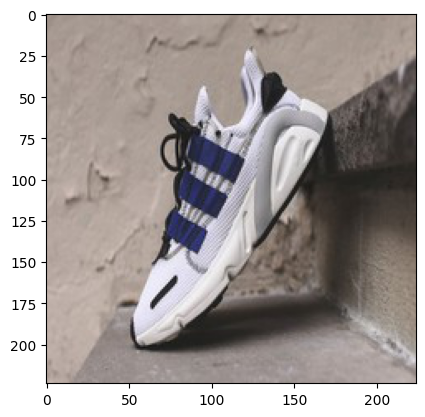

In [81]:
img=mpimg.imread("/content/train_new/Adidas (11).jpg") 
imgplt=plt.imshow(img)
plt.show

In [82]:
file_names=os.listdir("/content/train_new")
for i in range(5):
  name=file_names[i]
  print(name[0:17])

Adidas (54).JPG
Image_205.jpg
adidas_ (23).jpg
Adidas (84).jpg
Image_18.jpg


In [83]:
file_names=os.listdir("/content/train_new")
adidas_count=0
nike_count=0

for img_file in file_names:
  name=img_file[0:6]
  name2=img_file[0:7]
  name3=img_file[0:5]
  name4=img_file[0:6]

  if name=="Adidas":
   adidas_count+=1

  if name4=="adidas":
    adidas_count+=1

  if name2=="aadidas":
    adidas_count+=1

  if name3=="Image":
    nike_count+=1

print("number of adidas images:",adidas_count)
print("number of nike images:",nike_count)


number of adidas images: 230
number of nike images: 230


Resizing all the images

In [85]:
os.mkdir("/content/image resized")

FileExistsError: ignored

/content/train_new/Image_18.jpg 

In [86]:
original_folder="/content/train_new"
resized_folder="/content/image resized"

for i in range(460):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+"/"+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert("RGB")

  newimgpath=resized_folder+"/"+filename
  img.save(newimgpath)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


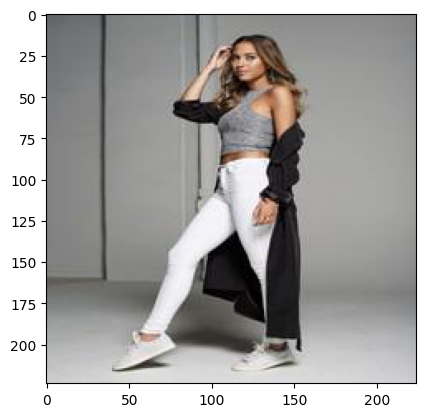

In [87]:
img=mpimg.imread("/content/image resized/Adidas (15).jpg")
imgplt=plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Adidas>1

Nike-->0

In [88]:
filenames=os.listdir("/content/image resized")

labels=[]

for img_names in filenames:
  if img_names[0:6]=="Adidas" :
    labels.append(1)

  if img_names[0:7]=="aadidas":
    labels.append(1)

  if img_names[0:5]=="Image":
    labels.append(0)

  if img_names[0:6]=="adidas" :
    labels.append(1)

  
  

  

In [89]:
print(labels)

[1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 

In [90]:
print(len(labels))

460


In [91]:
print(len(filenames))

460


In [122]:
count=0
for x  in filenames:
  if x=="Adidas (11).jpg":
     print(count)
     
  else:
    count+=1

  

393


In [125]:
print(filenames[392:394])


['Adidas (76).jpg', 'Adidas (11).jpg']


In [124]:
print(labels[392:394])

[1, 1]


In [94]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[230 230]


Converting all the resized images to numpy arrays

In [95]:
import cv2
import glob
import keras

In [96]:
image_directory="/content/image resized/"
image_extension=["JPG","jpg"]

files=[]

[files.extend(glob.glob(image_directory+ "*." +i)) for i in image_extension]

adidas_nike_images = np.asarray([cv2.imread(file) for file in files])


In [97]:
print(adidas_nike_images)

[[[[157 185 202]
   [165 193 210]
   [175 203 220]
   ...
   [171 187 199]
   [172 188 200]
   [164 180 192]]

  [[163 191 208]
   [169 197 214]
   [175 203 220]
   ...
   [169 185 197]
   [165 181 193]
   [155 171 183]]

  [[171 199 216]
   [172 200 217]
   [172 200 217]
   ...
   [167 183 195]
   [161 177 189]
   [151 167 179]]

  ...

  [[114 116 116]
   [115 117 117]
   [116 118 118]
   ...
   [168 182 234]
   [164 178 230]
   [161 175 227]]

  [[115 117 117]
   [114 116 116]
   [113 115 115]
   ...
   [167 181 233]
   [164 178 230]
   [162 176 228]]

  [[121 123 123]
   [118 120 120]
   [115 117 117]
   ...
   [166 180 232]
   [164 178 230]
   [161 175 227]]]


 [[[158 163 164]
   [158 163 164]
   [158 163 164]
   ...
   [155 156 160]
   [155 156 160]
   [154 155 159]]

  [[158 163 164]
   [158 163 164]
   [158 163 164]
   ...
   [157 160 165]
   [156 159 164]
   [156 159 164]]

  [[158 163 164]
   [158 163 164]
   [158 163 164]
   ...
   [153 158 167]
   [154 159 168]
   [154 159

In [98]:
print(len(adidas_nike_images))

460


In [99]:
type(adidas_nike_images)

numpy.ndarray

In [100]:
print(adidas_nike_images.shape)

(460, 224, 224, 3)


In [101]:
X=adidas_nike_images
Y=np.asarray(labels)

In [102]:
print(Y)

[1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1
 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0
 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1
 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1
 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1]


In [103]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [104]:
print(X.shape,X_train.shape,X_test.shape)

(460, 224, 224, 3) (368, 224, 224, 3) (92, 224, 224, 3)


In [105]:
print(Y_train.shape,Y_test.shape)

(368,) (92,)


In [106]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [107]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [108]:
print(X_test)

[[[[ 95  91  72]
   [ 95  93  75]
   [104 107  91]
   ...
   [149 171 146]
   [148 170 145]
   [147 169 144]]

  [[ 93  89  70]
   [ 95  93  75]
   [106 109  93]
   ...
   [149 171 146]
   [148 170 145]
   [148 170 145]]

  [[ 92  88  69]
   [ 96  94  76]
   [109 112  96]
   ...
   [150 172 147]
   [149 171 146]
   [149 171 146]]

  ...

  [[ 80  65  49]
   [ 80  65  49]
   [ 79  64  48]
   ...
   [ 38  19   4]
   [ 38  19   4]
   [ 38  19   4]]

  [[ 84  69  53]
   [ 83  68  52]
   [ 82  67  51]
   ...
   [ 38  19   4]
   [ 38  19   4]
   [ 38  19   4]]

  [[ 86  71  55]
   [ 85  70  54]
   [ 84  69  53]
   ...
   [ 38  19   4]
   [ 38  19   4]
   [ 38  19   4]]]


 [[[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  7   5   5]
   [  7   5   5]
   [  7   5   5]]

  [[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  7   5   5]
   [  7   5   5]
   [  7   5   5]]

  [[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  7   5   5]
   [  7   5   5]
   [  7   5

In [109]:
print(X_test_scaled)

[[[[0.37254902 0.35686275 0.28235294]
   [0.37254902 0.36470588 0.29411765]
   [0.40784314 0.41960784 0.35686275]
   ...
   [0.58431373 0.67058824 0.57254902]
   [0.58039216 0.66666667 0.56862745]
   [0.57647059 0.6627451  0.56470588]]

  [[0.36470588 0.34901961 0.2745098 ]
   [0.37254902 0.36470588 0.29411765]
   [0.41568627 0.42745098 0.36470588]
   ...
   [0.58431373 0.67058824 0.57254902]
   [0.58039216 0.66666667 0.56862745]
   [0.58039216 0.66666667 0.56862745]]

  [[0.36078431 0.34509804 0.27058824]
   [0.37647059 0.36862745 0.29803922]
   [0.42745098 0.43921569 0.37647059]
   ...
   [0.58823529 0.6745098  0.57647059]
   [0.58431373 0.67058824 0.57254902]
   [0.58431373 0.67058824 0.57254902]]

  ...

  [[0.31372549 0.25490196 0.19215686]
   [0.31372549 0.25490196 0.19215686]
   [0.30980392 0.25098039 0.18823529]
   ...
   [0.14901961 0.0745098  0.01568627]
   [0.14901961 0.0745098  0.01568627]
   [0.14901961 0.0745098  0.01568627]]

  [[0.32941176 0.27058824 0.20784314]
   [0.3

In [110]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [111]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [112]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_13 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [113]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [131]:
model.fit(X_train_scaled, Y_train,validation_split=0.1, epochs=5)

Epoch 1/5
11/11 [==============================] - 9s 751ms/step - loss: 0.6931 - acc: 0.4834 - val_loss: 0.6931 - val_acc: 0.6757
Epoch 2/5
11/11 [==============================] - 8s 749ms/step - loss: 0.6931 - acc: 0.4834 - val_loss: 0.6931 - val_acc: 0.6757
Epoch 3/5
11/11 [==============================] - 9s 799ms/step - loss: 0.6931 - acc: 0.4834 - val_loss: 0.6931 - val_acc: 0.6757
Epoch 4/5
11/11 [==============================] - 8s 708ms/step - loss: 0.6931 - acc: 0.4834 - val_loss: 0.6931 - val_acc: 0.6757
Epoch 5/5
11/11 [==============================] - 8s 768ms/step - loss: 0.6931 - acc: 0.4834 - val_loss: 0.6931 - val_acc: 0.6757


In [132]:
loss,acc=model.evaluate(X_test_scaled,Y_test)
print("Test Loss=",loss)
print("Test Accuracy=",acc)

3/3 [==============================] - 2s 619ms/step - loss: 0.6931 - acc: 0.5652
Test Loss= 0.6931471824645996
Test Accuracy= 0.5652173757553101


Path of the image to be predicted: /content/image resized/Adidas (34).jpg


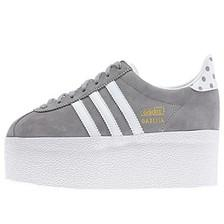

1/1 [==============================] - 0s 38ms/step
[[-2.244781  -3.6282744]]
0
The image represents a nike


In [136]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The image represents a adidas')

else:
  print('The image represents a nike')